In [30]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, ConfusionMatrixDisplay, PrecisionRecallDisplay

# Load the ready-to-use data from Notebook 2
data = joblib.load('../data/processed_data.pkl') 
X_train = data['X_train']
X_test = data['X_test']
y_train = data['y_train']
y_test = data['y_test']

print("Data loaded successfully!")

Data loaded successfully!


In [4]:
# Initialize and train Logistic Regression
log_model = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    random_state=42
)

log_model.fit(X_train, y_train)

# Predictions
y_pred_log = log_model.predict(X_test)
y_prob_log = log_model.predict_proba(X_test)[:, 1]

print("Logistic Regression Training Complete.")

Logistic Regression Training Complete.


In [8]:
print(classification_report(y_test, y_pred_log))
print("ROC AUC:", roc_auc_score(y_test, y_prob_log))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962

ROC AUC: 0.9720834996210077


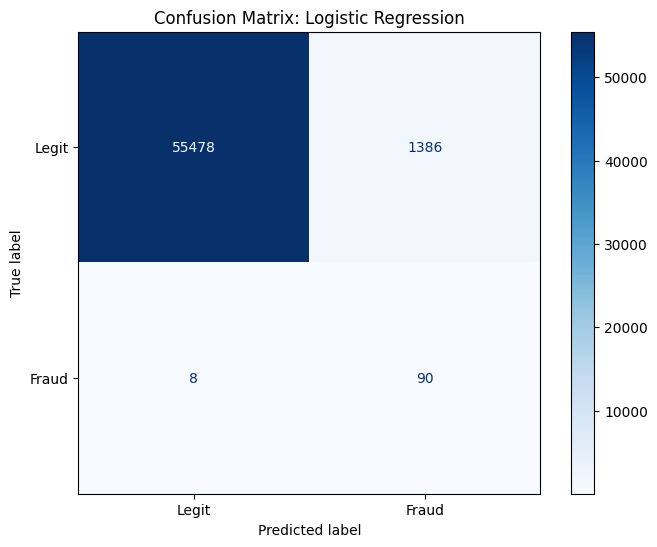

In [18]:
fig, ax = plt.subplots(figsize=(8, 6))

ConfusionMatrixDisplay.from_estimator(
    log_model, 
    X_test,
    y_test, 
    display_labels=['Legit', 'Fraud'],
    cmap='Blues',
    ax=ax
)

ax.set_title('Confusion Matrix: Logistic Regression')
plt.show()

<Figure size 800x600 with 0 Axes>

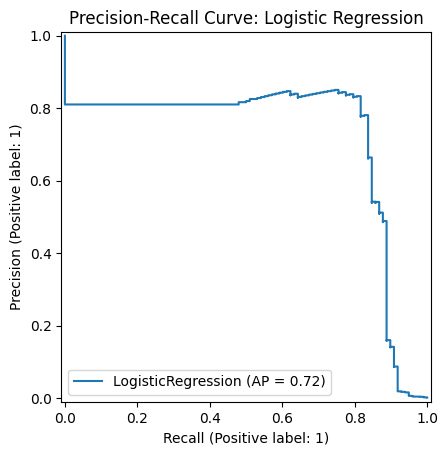

In [19]:
plt.figure(figsize=(8, 6))
PrecisionRecallDisplay.from_estimator(
    log_model, 
    X_test,
    y_test
)
plt.title('Precision-Recall Curve: Logistic Regression')
plt.show()

In [20]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)

rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200, n_jobs=-1,
                       random_state=42)

In [21]:
rf_pred = rf.predict(X_test)
rf_prob = rf.predict_proba(X_test)[:, 1]

print(classification_report(y_test, rf_pred))
print("ROC AUC:", roc_auc_score(y_test, rf_prob))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.76      0.85        98

    accuracy                           1.00     56962
   macro avg       0.98      0.88      0.92     56962
weighted avg       1.00      1.00      1.00     56962

ROC AUC: 0.9571936047913819


In [27]:
import joblib
import os

# Save the models
joblib.dump(log_model, "../models/logistic_fraud_model.pkl")
joblib.dump(rf, "../models/random_forest_fraud_model.pkl")

print("Models saved successfully to the ../models/ directory!")

Models saved successfully to the ../models/ directory!
